Cuaderno de trabajo de:
 - _Piloto_ : Nombre1 Apellido1 (username con el que os habéis logueado)
 - _Copiloto_ : Nombre2 Apellido2 [escribe el username2]

In [1]:
%matplotlib inline
import random

import numpy as np
import scipy as sc
import scipy.stats as st

import seaborn
import matplotlib.pyplot as plt

#importamos el fichero plot_prob.py que debe de estar en la misma
# carpeta que este cuaderno
from plot_prob import plot_samples_discrete, compara

# Variables aleatorias discretas con soporte infinito

Ya hemos encontrado una distribución de probabilidad discreta con soporte infinito: la ``Geométrica(p)``.

Sin embargo, no hemos hablado de cómo se calcula la *esperanza de una variable aleatoria discreta infinita*.

En este cuaderno, también estudiaremos la distribución de **Poisson**.

## Distribución geométrica

Repetimos un experimento aleatorio de Bernouilli que ofrece dos resultados:
  - 0, con probabilidad 1-p
  - 1, con probabilidad p

tantas veces como sea necesario, *de forma independiente*, hasta obtener "1" por primera vez, y anotamos cuántas veces hemos realizado el experimento (contando la última vez, que hemos obtenido "1").

Los posibles valores son los números positivos mayores que 1 => discreta infinita.

Depende de un uńico parámetro:
 - La probabilidad **p** de obtener un "1".
 
Ejemplos:
 - Lanzamos una moneda hasta obtener cara por primera vez.
 - Salimos con el barco tantas veces como sea necesario hasta avistar una ballena por primera vez, y anotamos el número de salidas.
 - Anotamos el número de días que un sistema ha funcionado sin averías entre dos reparaciones.
 

[Distribución geométrica en la wikipedia](https://en.wikipedia.org/wiki/Geometric_distribution).

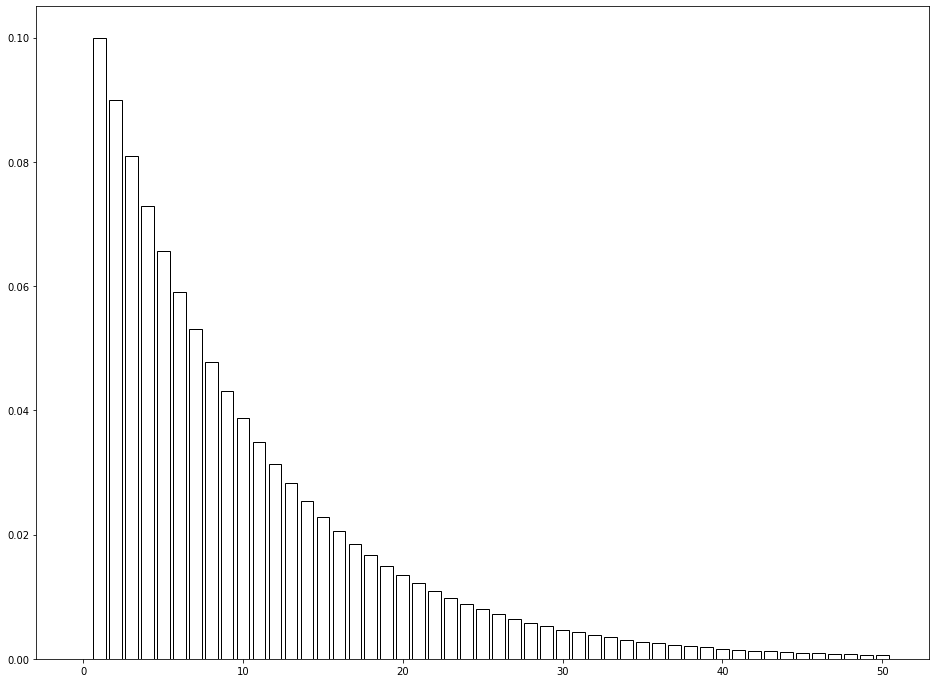

In [2]:
p0 = 0.1
G = st.geom(p=p0)
K = 50

plt.figure(figsize=(16,12))
plt.bar(range(K+1),[G.pmf(k) for k in range(K+1)],fill=False)
plt.show()

Sea X una VA que sigue una distribución geométrica.

> *Todos los enteros positivos son resultados posibles*

La **función de masa** $p(k)=P(X=k)$ toma un valor mayor que cero en cualquier k entero positivo. La probabilidad del conjunto de todos los enteros positivos debe ser uno, porque el resultado siempre será un entero positivo.
Como los distintos resultados son sucesos incompatibles, podemos calcular:
$$
P(X\in \mathbb{Z}^+) = \Sigma_{k=1}^\infty\:P(X=k) = 1
$$

Para la distribución geométrica, la función de masa es
$$
P(X=k) = (1-p)^{k-1}p
$$
Y podemos comprobar
$$
\Sigma_{k=1}^\infty\:P(X=k) = 
p\Sigma_{k=1}^\infty\: (1-p)^{k-1} =
p\Sigma_{k=0}^\infty\: (1-p)^{k} =
p\frac{1}{1-(1-p)} = 1
$$
usando la fórmula de la suma de una progresión geométrica.

In [3]:
# Vamos a aproximar esa suma
kmax = 50
p0 = 0.1

suma_acumulada = 0
for k in range(1,kmax):
    suma_acumulada += (1-p0)**(k-1)*p0
print(suma_acumulada)

0.9942735831029781


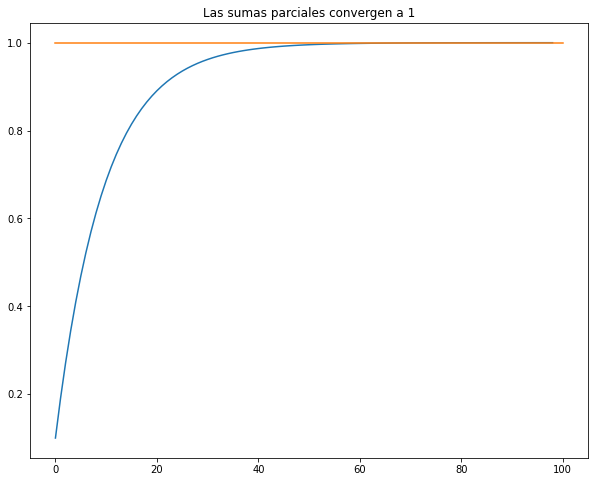

In [4]:
#Mejor lo dibujamos
kmax = 100
p0 = 0.1

suma_acumulada = 0
sumas_parciales = []
for k in range(1,kmax):
    suma_acumulada += (1-p0)**(k-1)*p0
    sumas_parciales.append(suma_acumulada)

plt.figure(figsize=(10,8))
plt.plot(sumas_parciales)
plt.plot([0,kmax],[1,1])
plt.title('Las sumas parciales convergen a 1')
plt.show()

Por supuesto, scipy.stats, y cualquier otra librería similar, pueden calcular estas sumas parciales.

De hecho, son una herramienta muy práctica, y tienen un nombre especial:

### Función de distribución

La **función de distribución** $F$ de una VA $X$ se define como:

$$
F(k) = P(X\leq k)
$$

Las siglas en inglés son ``cdf`` (cumulative distribution function).
En scipy stats, usamos ``G.cdf(k)``. Es habitual usar una F mayúscula.

https://en.wikipedia.org/wiki/Cumulative_distribution_function

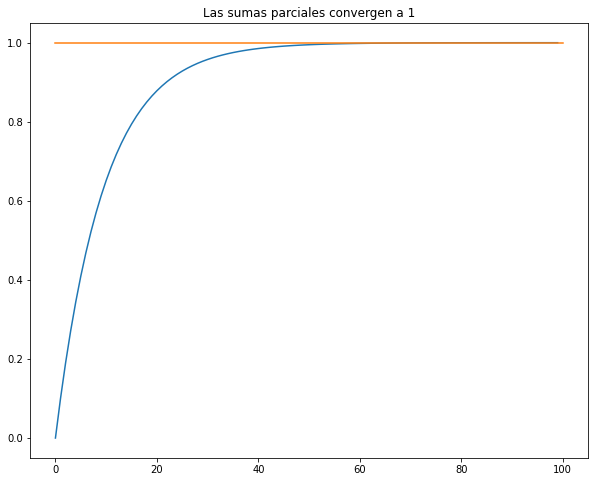

In [5]:
p0 = 0.1
kmax = 100

G = st.geom(p=p0)
plt.figure(figsize=(10,8))
plt.plot([G.cdf(k) for k in range(kmax)])
plt.plot([0,kmax],[1,1])
plt.title('Las sumas parciales convergen a 1')
plt.show()

Esta misma idea sirve para definir la **esperanza de una VA discreta infinita**. Se trata de sumar la serie infinita de valores $k\:P(X=k)$ sobre todo el soporte de $X$. Por ejemplo, si el soporte son los enteros positivos:

$$
E[X] = \Sigma_{k=1}^\infty\;k\:P(X=k)
$$
y si transformamos la variable X mediante la función $f$:
$$
E[f(X)] = \Sigma_{k=1}^\infty\;f(k)\:P(X=k)
$$
Estas sumas pueden ser *complicadas de resolver de forma exacta*, o incluso *imposibles*, pero podemos encontrar la esperanza y la varianza de las distribuciones famosas en los libros de texto, y *siempre podremos aproximarlas...*

10.0


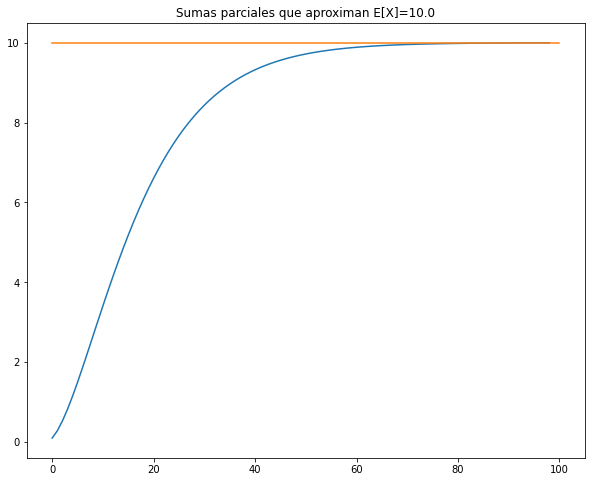

In [6]:
#Mejor lo dibujamos
kmax = 100
p0 = 0.1

G = st.geom(p=p0)
esperanza = 0
sumas_parciales = []
for k in range(1,kmax):
    esperanza += k*(1-p0)**(k-1)*p0
    sumas_parciales.append(esperanza)

print(G.mean())
plt.figure(figsize=(10,8))
plt.plot(sumas_parciales)
plt.plot([0,kmax],[G.mean(),G.mean()])
plt.title('Sumas parciales que aproximan E[X]=%s'%G.mean())
plt.show()

El valor calculado se aproxima al de la librería scipy.stats, que a su vez coincide con el valor de los libros de texto:
$$
E[Geom(p)] = \frac{1}{p}
$$

Veamos otro ejemplo: una forma habitual de calcular la varianza es mediante la fórmula
$$
Var[X] = E[(X-E[X])^2] = E[X^2] - E[X]^2
$$
Vamos a calcular estas cantidades de forma aproximada:

In [7]:
# Vamos a aproximar esa suma
kmax = 100
p0 = 0.1

esperanzaX = 0
esperanzaX2 = 0
for k in range(1,kmax):
    esperanzaX  += k*(1-p0)**(k-1)*p0
    esperanzaX2 += (k**2)*(1-p0)**(k-1)*p0

varianza = esperanzaX2 - esperanzaX**2
print(varianza, st.geom(p=p0).var())

89.71103114444813 90.0


El valor calculado se aproxima al de la librería scipy.stats, que a su vez coincide con el valor de los libros de texto:
$$
Var[Geom(p)] = \frac{1-p}{p^2}
$$

## Distribución de Poisson

Una distribución importante que modeliza las ocurrencias de fenómenos *"poco frecuentes"*, pero que aún así encontraremos si esperamos suficiente tiempo, y que son lo bastante importantes como para reflexionar sobre ellos.

### Ejemplos de la distribución de Poisson (de la wikipedia y otras fuentes)

La distribución de Poisson se aplica a varios fenómenos discretos de la naturaleza (esto es, aquellos fenómenos que ocurren 0, 1, 2, 3,... veces durante un periodo definido de tiempo o en un área determinada) cuando la probabilidad de ocurrencia del fenómeno es constante en el tiempo o el espacio. Ejemplos de estos eventos que pueden ser modelados por la distribución de Poisson incluyen:


  - Decaimiento espontáneo de átomos de una sustancia radioactiva.
  - Número de bombillas que se funden en un día.
  - Número de clientes que entran en una tienda.
  -  El número de autos que pasan a través de un cierto punto en una ruta (suficientemente distantes de los semáforos) durante un periodo definido de tiempo.
  -  El número de errores de ortografía que uno comete al escribir una única página.
  -  El número de llamadas telefónicas en una central telefónica por minuto.
  -  El número de accesos por minuto a un servidor web.
  -  El número de animales muertos encontrados por unidad de longitud de ruta.
  -  El número de mutaciones de determinada cadena de ADN después de cierta cantidad de radiación.
  -  El número de núcleos atómicos inestables que se han desintegrado en un determinado período.
  -  El número de estrellas en un determinado volumen de espacio.
  -  La distribución de receptores visuales en la retina del ojo humano.
  -  El número de patentes de un inventor a lo largo de su carrera.

**Atención**: en algunos de estos ejemplos, la tasa del proceso de Poisson puede no ser constante.

La distribución de Poisson es aplicable cuando estamos acumulando muchas fuentes independientes de *"éxitos"* u *"observaciones"*. Si por ejemplo contamos el número de delfines que hemos encontrado en una salida al mar, no sería un buen modelo, porque si encontramos uno, lo normal es que veamos muchos, ya que viajan en grupo.

Además, es necesario que la "tasa" $\lambda$ a la que ocurren estos sucesos sea constante. En otras palabras, el número medio de observaciones en un intervalo depende sólo de la longitud del intervalo, y es $\mu = \lambda T$. En realidad, este requisito no es imprescindible, porque se puede trabajar con una tasa que depende del tiempo, pero no trabajaremos esa posibilidad hoy.

El único parámetro de la distribución es el **promedio** $\mu$: a mayor $\mu$ más probable que haya muchas observaciones en el mismo intervalo:

- La función de masa:

$$
p(k) = {\displaystyle {\frac {\mu ^{k}e^{-\mu }}{k!}}}
$$

 - ¡La esperanza es $\mu$! Es interesante porque nos ayuda a fijar la tasa: *el número medio medio de observaciones en el intervalo de tiempo que consideramos*.
 
 - La varianza es $\mu$, la desviación típica es $\sqrt{\mu}$.

**Cuestión**: Dibuja la función de masa de la distribución de Poisson para distintos valores del parámetro.

In [8]:
#Leyendo la documentación de scipy.stats.poisson,
#vemos que el parámetro se llama mu
P = st.poisson?

In [9]:
P = st.poisson

In [10]:
P = st.poisson(mu=2)

In [11]:
#Comprobamos que la media, varianza y desviación típica son
#las que hemos visto:
print(P.mean(), P.var(), P.std())

2.0 2.0 1.4142135623730951


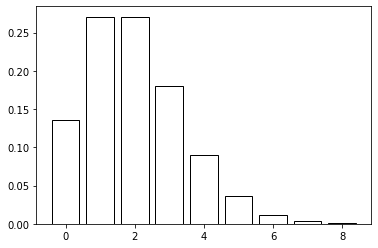

In [12]:
#ppf es la función "percentil": nos ayuda a encontrar un valor
#kmax tal que la probabilidad de que X sea menor que kmax sea muy
#grande
kmax = int(P.ppf(0.9999))
plt.bar(range(kmax),[P.pmf(k) for k in range(kmax)],
        fill=False)
plt.show()

Por ejemplo, si estamos considerando el _"número de bombillas que se funden en un día en la escuela"_, tomaríamos el número total de bombillas que se han reemplazado por ejemplo en un año, y dividimos entre el número de días que la escuela abre para obtener la tasa $\mu$=_"número de bombillas que se funden en un día en la escuela en **promedio**"_.

Supongamos que $\mu$ es 2.

 > *¿Cuál es la probabilidad de que en una semana laborable se fundan 20 bombillas o más?*

Si el número de bombillas que se funden en un día sigue una distribución de Poisson con parámetro $\mu$, entonces el número de bombillas que se funden en *cinco* días sigue una distribución de Poisson con parámetro $5\mu=10$.

La pregunta entonces es 
$$
P(X\geq 20) = 1 - P(X\leq 19)
$$
donde X *se distribuye como una Poisson(mu=10)*

In [13]:
P = st.poisson(mu=10)

In [14]:
#Usamos la función de distribución
1 - P.cdf(19)

0.0034543419758568117

### Aproximación de la distribución binomial

Una distribución ``Binomial(n,p)`` con n grande y p pequeño se puede aproximar por una ``Poisson(mu=n*p)``.

$$
\text{Binomial}(n,p) \approx \text{Poisson}(np)
$$

La lectura es clara: estamos contando el número n de ocurrencias de un suceso raro (su probabilidad es p) => para eso sirve la distribución de Poisson.

https://en.wikipedia.org/wiki/Poisson_limit_theorem

Prueba con distintos valores...

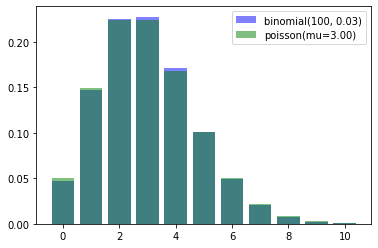

In [15]:
n0 = 100
p0 = 0.03
compara(st.binom(n=n0, p=p0), 'binomial(%d, %.2f)'%(n0,p0), 
        st.poisson(mu=n0*p0), 'poisson(mu=%.2f)'%(n0*p0))

## Glosario en inglés

 - **esperanza**: *expected value*, *expectation*
 - **varianza**: *variance*
 - **desviación típica**: *standard deviation*
 - **suceso poco frecuente**: *rare event*
 - **tasa**: *rate*
 - **función de masa**: *probability mass function*
 - **función de distribución**: *cumulative distribution function*

## Ejercicios

### Ejercicio 14 de la hoja 2

Si el número de defectos en un cable conductor de cobre sigue una distribución de Poisson, con una media de 2.3 defectos por cm, determinar:

 - a) Probabilidad de que haya exactamente 2 defectos en un cm de cable.
 - b) Probabilidad de que haya 10 defectos en 5 cm de cable.

### Ejercicio 2
Dicen que _"cada vez que lavas una cafetera italiana, un italiano muere"_ :
 - Simula el proceso de muertes de italianos mediante un proceso de Poisson. Busca en internet la tasa de mortandad en Italia.
 - Asume que pasas un minuto lavando la cafetera.
 - Calcula la probabilidad de que al menos un italiano muera mientras lavas tu cafetera italiana.
 - Calcula el número de italianos que mueren en promedio mientras lavas tu cafetera italiana.

**Aviso**: A partir de aquí, también pueden aparecer las distribuciones de la semana anterior.

### Ejercicio 15 de la hoja 2

En una concurrida intersección de tráfico, la probabilidad de que un coche que la atraviesa tenga un accidente es muy baja, p = 0,0001. Se supone que en el intervalo de 16 a 18h, 1000 coches atraviesan esa intersección en estas condiciones, 
 - ¿Cuál es la probabilidad de que dos o más accidentes ocurran en ese periodo?
 - ¿Cuántos días habría que esperar en media para ver un accidente en ese periodo?

### Ejercicio 19 de la hoja 2

En un proceso productivo se registran cinco incidencias de media por día. Encontrar la probabilidad de que el número de incidencias sea mayor de 5:
 - a) En un día dado.
 - b) En 3 de los siguientes 4 días.
 - c) Por primera vez en Abril el día 5.